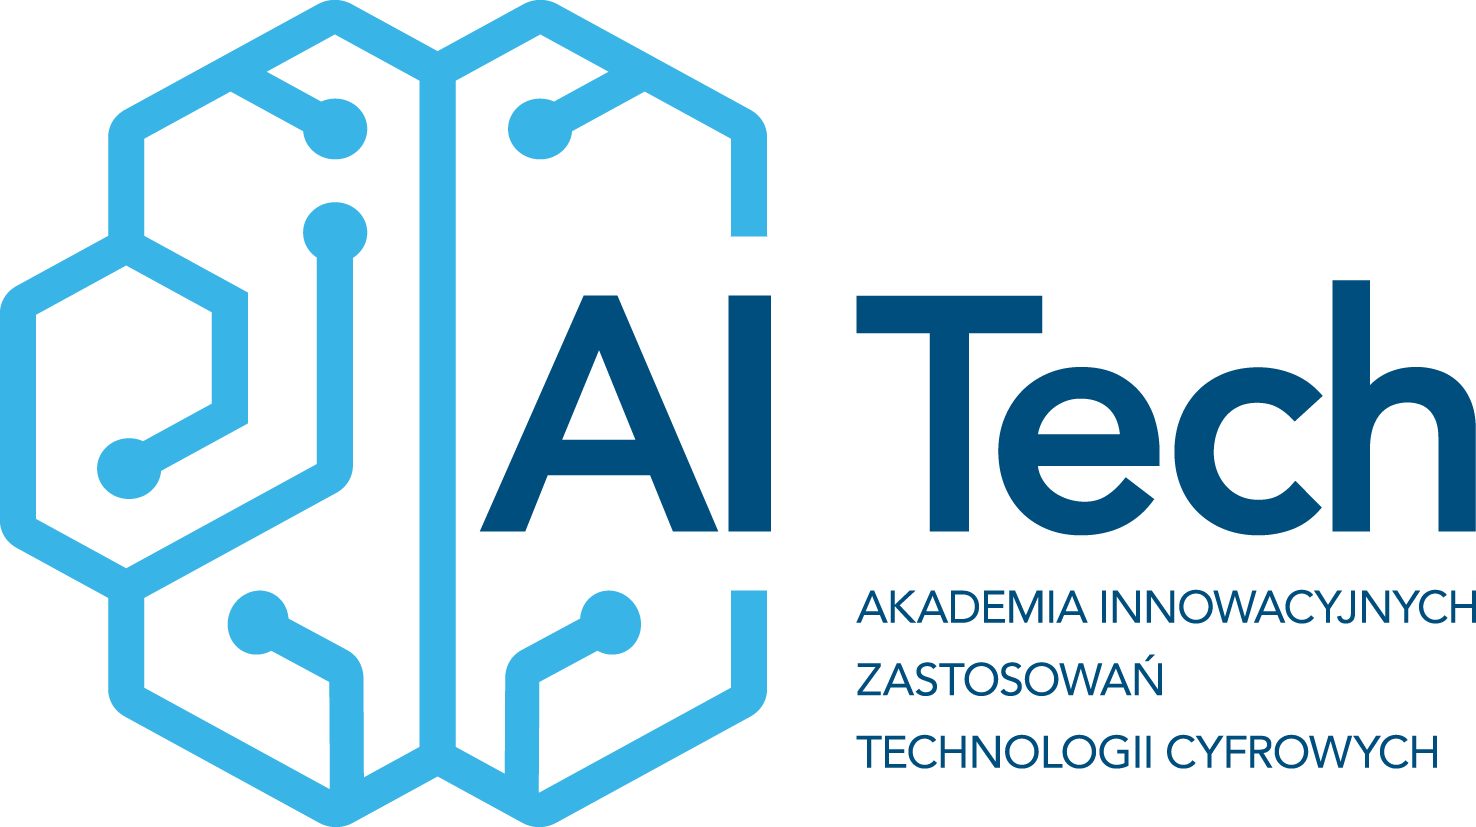



AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
<br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">SKRYPT DO LABORATORIUM</style></h1>
    <h1 style = "font-size:24px">Uczenie głebokie</style></h1>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 4:</style></h1>
    <h1 style = "font-size:24px">Modele generacyjne</style></h1>
    <h1 style = "font-size:24px">Przemysław Rośleń</style></h1>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

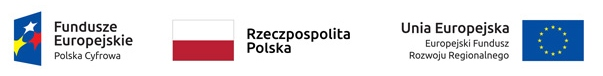

## **1.** Stworzenie sieci rekurencyjnej służącej do generowania tekstu

Na początku zaimportujemy niezbędne biblioteki potrzebne do pierwszej części ćwiczenia

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
# from keras.utils import np_utils
import keras.utils as np_utils

Zaimportujemy wybrany plik kodowany jako UTF-8 w formacie txt, bęacy naszym materiałem do treningu sieci.
Pliki txt, które są w domenie publicznej lub posiadają licencje zezwalające na użytek można uzyskać ze stron:


*   [Projekt Gutenberg](https://www.gutenberg.org/browse/languages/pl)

*   [Wolne Lektury](https://wolnelektury.pl/)

*  [Portal Czytać](https://czytac.com/)

Wybrać po jednym tytule reprezentującym różne gatunki (proza, poezja, dramat).
Załadować wybrany plik reprezentujący prozę.

In [ ]:
# Ładowanie pliku tekstowego ze znakami ASCII i konwersja do lowercase
filename = 'odprawa_dlugie.txt' #wpisz nazwę wybranego pliku
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

Ze względu na to, że sieć neuronowa na wejście nie przyjmie zwykłych znaków musimy je zamienić na inną reprezentację. W tym celu dokonamy zamiany uniklanych znaków wystepujących w wybranej ksiażce na postać liczbową.

In [ ]:
# Tworzenie mapowania unikalnych znaków na postać liczbową
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

**1a.**Sprawdzić długośc tekstu wejściowego oraz liczbę znaków w słowniku

In [ ]:
#tutaj umieść rozwiązanie
n_chars = len(raw_text)
print(f'Długość tekstu wejściowego: {n_chars}')
dictionary_size = len(chars)
print(f'Liczba znaków w słowniku: {dictionary_size}')

Długość tekstu wejściowego: 25879
Liczba znaków w słowniku: 51


Przy pomocy poniższego kod stworzone zostaną wzorce, na bazie których będziemy rozpoznawali znaki występujące w naszym słowniku stworzonym chwilę wcześniej.
Wartość zmiennej `seq_length` odpowiada za długość sekwencji, na bazie której przwidujemy kolejne znaki. Dla uproszczenia, gdyby sekwencja miała 6 znaków to pierwsze wzorce treningowe mogłyby wyglądać następująco:

śpiulk->o

piulko->l

iulkol->o

ulkolo->t


In [ ]:
# Przygotowanie zbioru danych składającego się z par wejście-wyjście zakodowanych jako liczby całkowite
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Łączna liczba wzorców: ", n_patterns)

Łączna liczba wzorców:  25779


**1b.**Dokonać normalizacji zmiennej X wykorzystując wielkość słownika obliczoną w punkcie 1a - pamietać, aby wartość ta była floatem oraz zakodować zmienną wyjściową `y` jako wektor typu one hot bazując na danych obliczonych we wcześniejszej komórce

In [ ]:
#  Reshape wektora X aby posiadał następujący kształt [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalizacja

# tutaj umieść rozwiązanie
X = X / (dictionary_size - 1)

# enkodowania typu one hot encode zmiennej wyjściowej (y)
# tutaj umieść rozwiązanie
import numpy as np

y = np.zeros(shape=(len(dataY), dictionary_size))

for index, value in enumerate(dataY):
    y[index, value] = 1

Zdefinujmy prosty model sieci RNN wykorzystujący jedną warstwę LSTM i 256 komórek

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

Zdefinujmy checkpoint, który może być przydatny w dalszych krokach, warto do nazwy checkpointa dodać nazwę pliku, na bazie którego sieć jest uczona

In [ ]:
filepath = filename + "-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

**1c.** Przeprowadź trening z wykorzystaniem `batch_size=128` oraz z wykorzystaniem zdefiniowanego powyżej calbacka przez min. 20 epok

In [ ]:
# tutaj umieść rozwiązanie

history = model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Epoch 1/20
4310/4311 [============================>.] - ETA: 0s - loss: 3.0896
Epoch 1: loss improved from inf to 3.08965, saving model to przedwiosnie_dlugie.txt-weights-improvement-01-3.0896.hdf5
4311/4311 [==============================] - 59s 13ms/step - loss: 3.0896
Epoch 2/20
4309/4311 [============================>.] - ETA: 0s - loss: 2.9692
Epoch 2: loss improved from 3.08965 to 2.96915, saving model to przedwiosnie_dlugie.txt-weights-improvement-02-2.9691.hdf5
4311/4311 [==============================] - 56s 13ms/step - loss: 2.9691
Epoch 3/20
4309/4311 [============================>.] - ETA: 0s - loss: 2.9007
Epoch 3: loss improved from 2.96915 to 2.90078, saving model to przedwiosnie_dlugie.txt-weights-improvement-03-2.9008.hdf5
4311/4311 [==============================] - 56s 13ms/step - loss: 2.9008
Epoch 4/20
4310/4311 [============================>.] - ETA: 0s - loss: 2.8332
Epoch 4: loss improved from 2.90078 to 2.83319, saving model to przedwiosnie_dlugie.txt-weights-i

**1d.**Dokonaj załadowania wytrenowanego modelu i jego kompilowania, wykorzystaj funkcję categorical crossentropy i optimizer ADAM

In [ ]:
# tutaj umieść rozwiązanie
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.load_weights('przedwiosnie_dlugie.txt-weights-improvement-20-2.3761.hdf5')

Dokonajmy odwrotnej transformacji z liczb całkowitych na znaki, aby moc odczytać tekst generowany przez wytrenowany model

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

Wygenerujmy teskt z wykorzystaniem wytrenowanego modelu, w tym celu musimy wylosowac ziarno, które posłuży do generacji dalszego ciągu tekstu.

In [ ]:
# Wybierzmy losowe ziarno będące początkiem generowanej sekwencji
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Wylosowane ziarno:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# Generowanie znaków
for i in range(200):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(dictionary_size)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(result, end='')
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nKoniec.")

Wylosowane ziarno:
" rwowana kobiecina zmarła. zwłaszcza w warunkach tak dla jej zdrowia nieodpowiednich. ale nie poddawa "
 pani wakie panie karoeinie o pie wiedział, coerze na pienii zasierienia się z tamie saroe sar m sienie pazez wa doz i sozarzysza z paza warozki w parie parie zarazał się w tamie sienie panie za sieri
Koniec.


**1e.** Korzystając z powyżego przykładu wytrenuj sieć dla dwóch pozostałych rodzajów literatury (poezja, dramat). Czy trening dla innego rodzaju literatury w sposób widoczny przenosi charakterystyczne cechy dla danego gatunku (rymy, liczbę głosek w wersie (np. trzynastozgłoskowiec w Panu Tadeuszu). Jeśli tak to dla jakiego gatunku? Czy uważasz, że możliwe jest użycie słowinka innego tekstu do generowania modelu w innym tekście?

In [ ]:
# wcześniej wybrano plik farys.txt

filepath = filename + "-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model_poetry = Sequential()
model_poetry.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model_poetry.add(Dropout(0.2))
model_poetry.add(Dense(y.shape[1], activation='softmax'))
model_poetry.compile(loss='categorical_crossentropy', optimizer='adam')

history = model_poetry.fit(X, y, epochs=100, batch_size=128, callbacks=callbacks_list)

Epoch 1/100
43/47 [==========================>...] - ETA: 0s - loss: 3.3139
Epoch 1: loss improved from inf to 3.30633, saving model to farys.txt-weights-improvement-01-3.3063.hdf5
47/47 [==============================] - 3s 16ms/step - loss: 3.3063
Epoch 2/100
44/47 [===========================>..] - ETA: 0s - loss: 3.1989
Epoch 2: loss improved from 3.30633 to 3.20039, saving model to farys.txt-weights-improvement-02-3.2004.hdf5
47/47 [==============================] - 1s 13ms/step - loss: 3.2004
Epoch 3/100
43/47 [==========================>...] - ETA: 0s - loss: 3.1932
Epoch 3: loss improved from 3.20039 to 3.19442, saving model to farys.txt-weights-improvement-03-3.1944.hdf5
47/47 [==============================] - 1s 13ms/step - loss: 3.1944
Epoch 4/100
47/47 [==============================] - ETA: 0s - loss: 3.1940
Epoch 4: loss improved from 3.19442 to 3.19397, saving model to farys.txt-weights-improvement-04-3.1940.hdf5
47/47 [==============================] - 1s 14ms/step - l

In [ ]:
model_poetry = Sequential()
model_poetry.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model_poetry.add(Dropout(0.2))
model_poetry.add(Dense(y.shape[1], activation='softmax'))
model_poetry.compile(loss='categorical_crossentropy', optimizer='adam')
model_poetry.load_weights('farys.txt-weights-improvement-84-0.6463.hdf5')

int_to_char = dict((i, c) for i, c in enumerate(chars))

start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Wylosowane ziarno:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

for i in range(200):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(dictionary_size)
	prediction = model_poetry.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(result, end='')
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nKoniec.")

Wylosowane ziarno:
" i.
    przez jamy, gdzie były oczy,
    przez odarte z ciała szczęki
    piasek strumieniem się tocz "
y
    i srowr miei zzę ieeeł.
    wi jil oo zieens s niebióka,
    tylko skary tam nocuuj,
    tylko skazy tam nocuuą,
    tylko skpy tamoo    romnie   orapm   urigne!
    pę naeiesa hasrot nadio,
   
Koniec.


In [ ]:
# wcześniej wybrano plik odprawa_dlugie.txt

filepath = filename + "-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model_drama = Sequential()
model_drama.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model_drama.add(Dropout(0.2))
model_drama.add(Dense(y.shape[1], activation='softmax'))
model_drama.compile(loss='categorical_crossentropy', optimizer='adam')

history = model_drama.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Epoch 1/20
199/202 [============================>.] - ETA: 0s - loss: 3.3064
Epoch 1: loss improved from inf to 3.30638, saving model to odprawa_dlugie.txt-weights-improvement-01-3.3064.hdf5
202/202 [==============================] - 5s 15ms/step - loss: 3.3064
Epoch 2/20
200/202 [============================>.] - ETA: 0s - loss: 3.2642
Epoch 2: loss improved from 3.30638 to 3.26421, saving model to odprawa_dlugie.txt-weights-improvement-02-3.2642.hdf5
202/202 [==============================] - 3s 13ms/step - loss: 3.2642
Epoch 3/20
201/202 [============================>.] - ETA: 0s - loss: 3.2455
Epoch 3: loss improved from 3.26421 to 3.24541, saving model to odprawa_dlugie.txt-weights-improvement-03-3.2454.hdf5
202/202 [==============================] - 3s 13ms/step - loss: 3.2454
Epoch 4/20
199/202 [============================>.] - ETA: 0s - loss: 3.1795
Epoch 4: loss improved from 3.24541 to 3.17800, saving model to odprawa_dlugie.txt-weights-improvement-04-3.1780.hdf5
202/202 [==

In [ ]:
model_drama = Sequential()
model_drama.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model_drama.add(Dropout(0.2))
model_drama.add(Dense(y.shape[1], activation='softmax'))
model_drama.compile(loss='categorical_crossentropy', optimizer='adam')
model_drama.load_weights('odprawa_dlugie.txt-weights-improvement-20-2.8671.hdf5')

int_to_char = dict((i, c) for i, c in enumerate(chars))

start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Wylosowane ziarno:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

for i in range(200):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(dictionary_size)
	prediction = model_drama.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(result, end='')
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nKoniec.")

Wylosowane ziarno:
" , a tam ich garść była.
prosili potym króla, aby wedle prawa
postąpił, a za więtszą częścią wyrok po "
z pasoe 
a ta  oakoe  we ze moez pas poez pas pado 
aoe sa nee tas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas nas n
Koniec.


# tutaj umieść rozwiązanie pisemne


### Rozwiązanie pisemne

Teksty wygenerowane na podstawie prozy i poezji przypominają swoje prawdziwe odpowiedniki pod względem struktury (forma ciągła dla prozy, strofa dla wiersza), natomiast większość wytworzonych słów nie istnieje. W przypadku dramatu model zapętlił się po kilkunastu słowach, co może być przejawem niedotrenowania. Wykorzystanie innych słowników dla innych modeli nie dałoby dobrych rezultatów ze względu na niekompatybilność znaków wejściowych i wyjściowych.

**1f.** Dokonaj ulepszenia sieci, może to być dodanie nowych warstw, zmiana wartości dopouty czy rozmiaru batchy. Zaprezentuj otrzymane wyniki. Staraj się nie przekroczyć 100 epok treningu. Dokonaj tego dla jednego wybranego rodzaju literatury (jeden plik .txt)

In [ ]:
# tutaj umieść rozwiązanie

from keras.layers import GRU

model = Sequential()
model.add(GRU(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(32))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

filepath = "odprawa-ulepszona-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(X, y, epochs=100, batch_size=128, callbacks=callbacks_list)

int_to_char = dict((i, c) for i, c in enumerate(chars))

start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Wylosowane ziarno:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

for i in range(200):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(dictionary_size)
	prediction = model_drama.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(result, end='')
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nKoniec.")

Epoch 1/100
201/202 [============================>.] - ETA: 0s - loss: 3.3835
Epoch 1: loss improved from inf to 3.38338, saving model to odprawa-ulepszona-weights-improvement-01-3.3834.hdf5
202/202 [==============================] - 5s 13ms/step - loss: 3.3834
Epoch 2/100
200/202 [============================>.] - ETA: 0s - loss: 3.2080
Epoch 2: loss improved from 3.38338 to 3.20730, saving model to odprawa-ulepszona-weights-improvement-02-3.2073.hdf5
202/202 [==============================] - 3s 13ms/step - loss: 3.2073
Epoch 3/100
198/202 [============================>.] - ETA: 0s - loss: 3.1625
Epoch 3: loss improved from 3.20730 to 3.15950, saving model to odprawa-ulepszona-weights-improvement-03-3.1595.hdf5
202/202 [==============================] - 2s 12ms/step - loss: 3.1595
Epoch 4/100
198/202 [============================>.] - ETA: 0s - loss: 3.1198
Epoch 4: loss improved from 3.15950 to 3.11942, saving model to odprawa-ulepszona-weights-improvement-04-3.1194.hdf5
202/202 [==

## **2.** Generowanie obrazu z użyciem sieci typu GAN

Tworzenie sieci typu GAN do generowania obrazów wymaga tworzenia dwóch osobnych sieci - dyskrymiantora, którego celem jest odróżnienie obrazów rzeczywistych od generowanych oraz genratora, w celu generowania obrazu, przykładowo poprzez użycie odwrotnych warstw splotowych w celu transformowania wejścia w pełen, dwuwymiarowyy obraz składający się z pewnych wartości pikseli


Zaimportujmy niezbędne biblioteki do tej części ćwiczenia

Wykorzystamy dataset MNIST zawierający obrazy ręcznie pisanych cyfr.

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

**2a.** Zaimportuj dataset mnist wykorzystując `keras.datasets.mnist`, dokonaj podziału na zbiór testowy i treningowy

In [ ]:
# tutaj umieść rozwiązanie

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**2b.** Sprawdź jak wyglądają elementy zbioru, wykorzystując funkcję `pyplot`

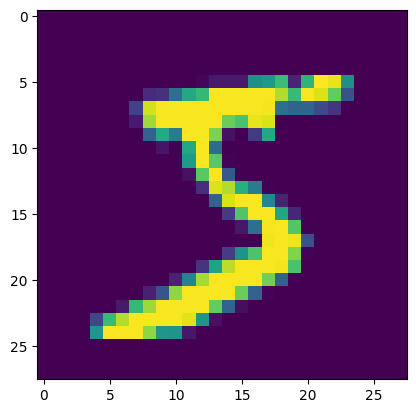

In [ ]:
# tutaj umieść rozwiązanie

pyplot.imshow(X_train[0])

Tak jak napisano wcześniej, sieć składa się z dyskryminatora i generatora, zdefinujmy modele dyskryminatora

In [ ]:
#Zdefinujmy dyskryminator
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))

  # kompilacja modelu
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

Teraz zdefinujmy model generatora, warto zwrócić uwage jak wykonywany jest upsampling

In [ ]:
# Zdefinujmy model generatora
def define_generator(latent_dim):
	model = Sequential()
	# Tworzymy obraz o wymiarach 7x7
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# Upsampling do 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# Upsampling do 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

Udało się zdefiniowac osobno modele dla dyskryminatora i generatora, teraz należy je połączyć

In [ ]:
# Zdefinujmy połączony model generatora i dyskryminatora, w celu aktualizacji generatora
def define_gan(g_model, d_model):
	# Wagi dyskyminatora powinny nie być trenowalne
	d_model.trainable = False
	# Połączenie obu modeli
	model = Sequential()
	# Dodanie generatora
	model.add(g_model)
	# Dodanie dyskryminatora
	model.add(d_model)
	# Kompilacja modeli
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

Konieczne jest załadowanie danych i przetowrzenie ich do odpowiedniej postaci

In [ ]:
# Dokonajmy załadowania MNIST-a i przygotowania obrazów treningowych
def load_real_samples():
	(trainX, _), (_, _) = load_data()
	# rozszerzenie do 3d, dodanie wymiaru kanałów
	X = expand_dims(trainX, axis=-1)
	# konwersja do float z unsigned int
	X = X.astype('float32')
	# zmiana skali z [0,255] do [0,1]
	X = X / 255.0
	return X

Musimy stworzyć też w ramach zbioru danych próbki prawdziwe i fałszywe, aby dyskryminator mógł poprawnie działać i rozpoznawać każdą z klas

In [ ]:
 # Wybór prawdziwych próbek
def generate_real_samples(dataset, n_samples):
	# wybór losowej instancji
	ix = randint(0, dataset.shape[0], n_samples)
	# otrzymanie wybranego obrazu
	X = dataset[ix]
	# tworzenie etykiet rzeczywistych klas
	y = ones((n_samples, 1))
	return X, y

Ze względu na sposób działania generatora ( wykorzystanie przestrzeni utajonej (ang. latent space) do generacji próbek, musimy zadeklarować te punkty)

In [ ]:
# Generowanie punktów w przestrzeni utajonej (ang. latent space) jako wejście dla generatora
def generate_latent_points(latent_dim, n_samples):
	# generowanie punktów w przestrzeniu utajonej
	x_input = randn(latent_dim * n_samples)
	# zmiana wymiaru do batcha wejściowego do sieci
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

Na bazie przestrzeni utajonej możemy generować nasze fałszywe próbki podszywające się pod oryginalny MNIST

In [ ]:
# Wykorzystanie generatora do wygenerowania n fałszywych przykładów z etykietami klas
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generowanie punktów w przestrzeni utajonej
	x_input = generate_latent_points(latent_dim, n_samples)
	# predykcja wyjść
	X = g_model.predict(x_input)
	# tworzenie etykiet fałszywych klas
	y = zeros((n_samples, 1))
	return X, y

Dzięki poniższej komórce zobaczymy jak wyglądają generowane przez generator obrazy

In [ ]:
 #  tworzenie i zapisywanie obrazy generowanych obrazów (odwórcone odcienie szarości)
def save_plot(examples, epoch, n=10, filename_override=None):
	for i in range(n * n):
		pyplot.subplot(n, n, 1 + i)
		# wyłączenie osi
		pyplot.axis('off')
		# rysowanie surowych danych
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# zapis do pliku
	filename = 'generated_plot_e%03d.png' % (epoch+1) if filename_override is None else filename_override
	pyplot.savefig(filename)
	pyplot.close()

Musimy też zapewnić ocenę jakości trenowanego rozwiązania, poniżej jeden ze sposobów, dokonujemy też zapisu modelu co ustalony krok

In [ ]:
 # Ewaluacja dyskryminatora, rysowanie wygenerowanych obrazów, zapis modelu generatora
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# tworzenie próbek rzeczywsitych
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# ewaluacja dyskryminatora na próbkach rzeczywistych
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# tworzenie fałszywych próbek
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# ewaluacja dyskryminatora na próbkach fałszywych
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# Podsumowanie działania dyskryminatora
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	save_plot(x_fake, epoch)
	# zapis modelu generatora
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

Tutaj możemy przejść do właściwego treningu, warto już na początku zastanowić się w jakim stoponiu wartości `n_epochs`, `n_batch` oraz `latent_dim` wpływają na trening i działanie sieci GAN.

In [ ]:
# Trening dyskryminatora i generatora
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# ręczne numerowanie epok
	for i in range(n_epochs):
		# numerowanie batchy w zbiorze trenngowym
		for j in range(bat_per_epo):
			# lsoowe wybierane "prawdziwyc" próbek
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generowanie fąłszywych przykładów
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# tworzenie zbioru treningowego dla dyskryminatora
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# aktualizacja wag modelu dyskryminatora =
			d_loss, _ = d_model.train_on_batch(X, y)
			# tworzenie punktów w przestrzeni utajnej jako wejścia do generatora
			X_gan = generate_latent_points(latent_dim, n_batch)
			# tworzenie odwróconych etykiet dla fłaszywych próbek
			y_gan = ones((n_batch, 1))
			# aktualizacja generatora z wykorzystaniem funkcji straty dyskryminatora
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# podsumowanie funkcji straty dla danego batcha
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# ewaluacja modelu, co 5 epok
		if (i+1) % 5 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# rozmiar przestrzeni utajonej
latent_dim = 100
# tworzenie instancji dyskryminatora
d_model = define_discriminator()
# tworzenie instancji generatora
g_model = define_generator(latent_dim)
# tworzenie instancji sieci GAN
gan_model = define_gan(g_model, d_model)
# ładowanie danych
dataset = load_real_samples()
# Trening
train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 2s 4ms/step
>1, 1/234, d=0.688, g=0.729
4/4 [==============================] - 0s 3ms/step
>1, 2/234, d=0.683, g=0.744
4/4 [==============================] - 0s 4ms/step
>1, 3/234, d=0.681, g=0.746
4/4 [==============================] - 0s 3ms/step
>1, 4/234, d=0.684, g=0.736
4/4 [==============================] - 0s 3ms/step
>1, 5/234, d=0.693, g=0.711
4/4 [==============================] - 0s 3ms/step
>1, 6/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>1, 7/234, d=0.689, g=0.693
4/4 [==============================] - 0s 4ms/step
>1, 8/234, d=0.686, g=0.692
4/4 [==============================] - 0s 4ms/step
>1, 9/234, d=0.682, g=0.692
4/4 [==============================] - 0s 4ms/step
>1, 10/234, d=0.678, g=0.693
4/4 [==============================] - 0s 4ms/step
>1, 11/234, d=0.676, g=0.693
4/4 [==============================] - 0s 4ms/step
>1, 12/234, d=0.668, g=0.693
4/4 [==============================] - 0s 4ms/ste

4/4 [==============================] - 0s 5ms/step
>6, 1/234, d=0.692, g=0.692
4/4 [==============================] - 0s 4ms/step
>6, 2/234, d=0.697, g=0.688
4/4 [==============================] - 0s 4ms/step
>6, 3/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>6, 4/234, d=0.695, g=0.693
4/4 [==============================] - 0s 4ms/step
>6, 5/234, d=0.695, g=0.696
4/4 [==============================] - 0s 4ms/step
>6, 6/234, d=0.697, g=0.696
4/4 [==============================] - 0s 4ms/step
>6, 7/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>6, 8/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>6, 9/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>6, 10/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>6, 11/234, d=0.697, g=0.688
4/4 [==============================] - 0s 4ms/step
>6, 12/234, d=0.697, g=0.687
4/4 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 10ms/step
>11, 1/234, d=0.693, g=0.695
4/4 [==============================] - 0s 7ms/step
>11, 2/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>11, 3/234, d=0.693, g=0.690
4/4 [==============================] - 0s 6ms/step
>11, 4/234, d=0.693, g=0.692
4/4 [==============================] - 0s 8ms/step
>11, 5/234, d=0.691, g=0.693
4/4 [==============================] - 0s 5ms/step
>11, 6/234, d=0.692, g=0.696
4/4 [==============================] - 0s 6ms/step
>11, 7/234, d=0.694, g=0.694
4/4 [==============================] - 0s 6ms/step
>11, 8/234, d=0.692, g=0.692
4/4 [==============================] - 0s 6ms/step
>11, 9/234, d=0.692, g=0.693
4/4 [==============================] - 0s 4ms/step
>11, 10/234, d=0.694, g=0.697
4/4 [==============================] - 0s 6ms/step
>11, 11/234, d=0.695, g=0.694
4/4 [==============================] - 0s 7ms/step
>11, 12/234, d=0.695, g=0.692
4/4 [==============================]

4/4 [==============================] - 0s 5ms/step
>16, 1/234, d=0.227, g=1.998
4/4 [==============================] - 0s 5ms/step
>16, 2/234, d=0.224, g=1.995
4/4 [==============================] - 0s 4ms/step
>16, 3/234, d=0.246, g=1.642
4/4 [==============================] - 0s 4ms/step
>16, 4/234, d=0.248, g=2.034
4/4 [==============================] - 0s 4ms/step
>16, 5/234, d=0.251, g=1.912
4/4 [==============================] - 0s 4ms/step
>16, 6/234, d=0.225, g=1.593
4/4 [==============================] - 0s 3ms/step
>16, 7/234, d=0.248, g=1.609
4/4 [==============================] - 0s 5ms/step
>16, 8/234, d=0.249, g=1.901
4/4 [==============================] - 0s 3ms/step
>16, 9/234, d=0.252, g=1.985
4/4 [==============================] - 0s 4ms/step
>16, 10/234, d=0.231, g=1.767
4/4 [==============================] - 0s 4ms/step
>16, 11/234, d=0.257, g=1.725
4/4 [==============================] - 0s 3ms/step
>16, 12/234, d=0.243, g=1.897
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>21, 1/234, d=0.034, g=5.387
4/4 [==============================] - 0s 6ms/step
>21, 2/234, d=0.019, g=5.501
4/4 [==============================] - 0s 4ms/step
>21, 3/234, d=0.033, g=5.242
4/4 [==============================] - 0s 4ms/step
>21, 4/234, d=0.022, g=5.102
4/4 [==============================] - 0s 4ms/step
>21, 5/234, d=0.029, g=5.126
4/4 [==============================] - 0s 4ms/step
>21, 6/234, d=0.022, g=5.175
4/4 [==============================] - 0s 4ms/step
>21, 7/234, d=0.022, g=5.997
4/4 [==============================] - 0s 3ms/step
>21, 8/234, d=0.026, g=5.576
4/4 [==============================] - 0s 4ms/step
>21, 9/234, d=0.024, g=5.054
4/4 [==============================] - 0s 4ms/step
>21, 10/234, d=0.026, g=5.249
4/4 [==============================] - 0s 4ms/step
>21, 11/234, d=0.020, g=5.467
4/4 [==============================] - 0s 4ms/step
>21, 12/234, d=0.018, g=5.629
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>26, 1/234, d=0.006, g=7.485
4/4 [==============================] - 0s 5ms/step
>26, 2/234, d=0.004, g=7.569
4/4 [==============================] - 0s 4ms/step
>26, 3/234, d=0.005, g=7.494
4/4 [==============================] - 0s 4ms/step
>26, 4/234, d=0.011, g=7.616
4/4 [==============================] - 0s 4ms/step
>26, 5/234, d=0.004, g=7.508
4/4 [==============================] - 0s 4ms/step
>26, 6/234, d=0.007, g=7.455
4/4 [==============================] - 0s 5ms/step
>26, 7/234, d=0.039, g=6.766
4/4 [==============================] - 0s 4ms/step
>26, 8/234, d=0.007, g=6.438
4/4 [==============================] - 0s 4ms/step
>26, 9/234, d=0.007, g=6.786
4/4 [==============================] - 0s 5ms/step
>26, 10/234, d=0.012, g=7.289
4/4 [==============================] - 0s 4ms/step
>26, 11/234, d=0.036, g=7.393
4/4 [==============================] - 0s 4ms/step
>26, 12/234, d=0.010, g=7.846
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>31, 1/234, d=0.045, g=6.211
4/4 [==============================] - 0s 5ms/step
>31, 2/234, d=0.019, g=8.139
4/4 [==============================] - 0s 5ms/step
>31, 3/234, d=0.013, g=8.469
4/4 [==============================] - 0s 4ms/step
>31, 4/234, d=0.003, g=8.945
4/4 [==============================] - 0s 4ms/step
>31, 5/234, d=0.048, g=6.539
4/4 [==============================] - 0s 4ms/step
>31, 6/234, d=0.012, g=6.785
4/4 [==============================] - 0s 4ms/step
>31, 7/234, d=0.004, g=7.357
4/4 [==============================] - 0s 5ms/step
>31, 8/234, d=0.009, g=8.846
4/4 [==============================] - 0s 4ms/step
>31, 9/234, d=0.005, g=8.783
4/4 [==============================] - 0s 4ms/step
>31, 10/234, d=0.005, g=9.586
4/4 [==============================] - 0s 4ms/step
>31, 11/234, d=0.012, g=8.125
4/4 [==============================] - 0s 4ms/step
>31, 12/234, d=0.005, g=7.331
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>36, 1/234, d=0.019, g=8.906
4/4 [==============================] - 0s 5ms/step
>36, 2/234, d=0.001, g=8.583
4/4 [==============================] - 0s 6ms/step
>36, 3/234, d=0.004, g=8.517
4/4 [==============================] - 0s 6ms/step
>36, 4/234, d=0.001, g=8.718
4/4 [==============================] - 0s 5ms/step
>36, 5/234, d=0.003, g=8.759
4/4 [==============================] - 0s 7ms/step
>36, 6/234, d=0.003, g=8.573
4/4 [==============================] - 0s 6ms/step
>36, 7/234, d=0.004, g=8.546
4/4 [==============================] - 0s 6ms/step
>36, 8/234, d=0.002, g=8.249
4/4 [==============================] - 0s 4ms/step
>36, 9/234, d=0.006, g=8.503
4/4 [==============================] - 0s 4ms/step
>36, 10/234, d=0.002, g=9.378
4/4 [==============================] - 0s 5ms/step
>36, 11/234, d=0.003, g=9.218
4/4 [==============================] - 0s 4ms/step
>36, 12/234, d=0.002, g=9.212
4/4 [==============================] 

4/4 [==============================] - 0s 7ms/step
>41, 1/234, d=0.002, g=9.389
4/4 [==============================] - 0s 9ms/step
>41, 2/234, d=0.002, g=9.339
4/4 [==============================] - 0s 8ms/step
>41, 3/234, d=0.001, g=9.458
4/4 [==============================] - 0s 9ms/step
>41, 4/234, d=0.001, g=9.584
4/4 [==============================] - 0s 4ms/step
>41, 5/234, d=0.006, g=9.739
4/4 [==============================] - 0s 4ms/step
>41, 6/234, d=0.004, g=8.921
4/4 [==============================] - 0s 4ms/step
>41, 7/234, d=0.016, g=8.864
4/4 [==============================] - 0s 9ms/step
>41, 8/234, d=0.002, g=9.460
4/4 [==============================] - 0s 7ms/step
>41, 9/234, d=0.005, g=9.076
4/4 [==============================] - 0s 11ms/step
>41, 10/234, d=0.015, g=8.754
4/4 [==============================] - 0s 5ms/step
>41, 11/234, d=0.003, g=8.799
4/4 [==============================] - 0s 7ms/step
>41, 12/234, d=0.010, g=8.741
4/4 [==============================]

4/4 [==============================] - 0s 5ms/step
>46, 1/234, d=0.000, g=10.361
4/4 [==============================] - 0s 4ms/step
>46, 2/234, d=0.001, g=11.241
4/4 [==============================] - 0s 4ms/step
>46, 3/234, d=0.015, g=10.115
4/4 [==============================] - 0s 4ms/step
>46, 4/234, d=0.002, g=9.722
4/4 [==============================] - 0s 5ms/step
>46, 5/234, d=0.001, g=10.069
4/4 [==============================] - 0s 4ms/step
>46, 6/234, d=0.019, g=9.573
4/4 [==============================] - 0s 4ms/step
>46, 7/234, d=0.012, g=10.097
4/4 [==============================] - 0s 4ms/step
>46, 8/234, d=0.004, g=10.845
4/4 [==============================] - 0s 5ms/step
>46, 9/234, d=0.000, g=11.192
4/4 [==============================] - 0s 3ms/step
>46, 10/234, d=0.010, g=10.848
4/4 [==============================] - 0s 5ms/step
>46, 11/234, d=0.001, g=10.783
4/4 [==============================] - 0s 5ms/step
>46, 12/234, d=0.033, g=9.301
4/4 [=======================

4/4 [==============================] - 0s 5ms/step
>51, 1/234, d=0.004, g=11.872
4/4 [==============================] - 0s 5ms/step
>51, 2/234, d=0.001, g=11.491
4/4 [==============================] - 0s 5ms/step
>51, 3/234, d=0.002, g=11.081
4/4 [==============================] - 0s 7ms/step
>51, 4/234, d=0.001, g=10.690
4/4 [==============================] - 0s 6ms/step
>51, 5/234, d=0.003, g=11.007
4/4 [==============================] - 0s 4ms/step
>51, 6/234, d=0.001, g=11.278
4/4 [==============================] - 0s 4ms/step
>51, 7/234, d=0.001, g=11.588
4/4 [==============================] - 0s 4ms/step
>51, 8/234, d=0.027, g=9.633
4/4 [==============================] - 0s 4ms/step
>51, 9/234, d=0.002, g=10.017
4/4 [==============================] - 0s 4ms/step
>51, 10/234, d=0.004, g=10.796
4/4 [==============================] - 0s 4ms/step
>51, 11/234, d=0.002, g=11.755
4/4 [==============================] - 0s 3ms/step
>51, 12/234, d=0.003, g=11.513
4/4 [=====================

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.saving import load_model

# Załaduj model
model = load_model('generator_model_010.h5') #nazwa modelu wytrenowanego i zapisanego we wcześniejszym kroku
# Wygeneruj obraz
latent_points = generate_latent_points(100, 25)
X = model.predict(latent_points)
#Narysuj wynik
save_plot(X, 5, n=5, filename_override='generator_model_final.png')

1/1 [==============================] - 0s 105ms/step


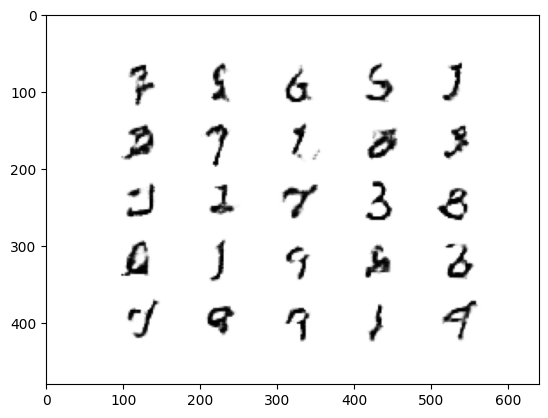

In [ ]:
pyplot.imshow(pyplot.imread('generator_model_final.png'))

**2c.**
Korzystając z powyższej komórki, czy otrzymany wynik przypomina dane ze zbioru MNIST? Odpowiedź uzasdanij


# tutaj umieść rozwiązanie

### Odpowiedź

Otrzymany wynik przypomina dane ze zbioru MNIST. Model najlepiej radził sobie do 10 epoki - później jakość ulegała stopniowej degradacji, dlatego zatrzymaliśmy trening po 50. epoce.

**2d.**
# Zadanie dodatkowe
Zaproponuj usprawnienia sieci GAN w oparciu o poczynione obserwacje, wykorzystaj jedną ze wskazanych zmiennych, na które warto zwrócić uwagę przy treningu.

In [ ]:
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
  model.add(Conv2D(32, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))

  # kompilacja modelu
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [ ]:
def define_generator(latent_dim):
	model = Sequential()
	# Tworzymy obraz o wymiarach 7x7
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# Upsampling do 14x14
	model.add(Conv2DTranspose(128*2, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# Upsampling do 28x28
	model.add(Conv2DTranspose(128*2, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

In [ ]:
def define_gan(g_model, d_model):
	# Wagi dyskyminatora powinny nie być trenowalne
	d_model.trainable = False
	# Połączenie obu modeli
	model = Sequential()
	# Dodanie generatora
	model.add(g_model)
	# Dodanie dyskryminatora
	model.add(d_model)
	# Kompilacja modeli
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
# rozmiar przestrzeni utajonej
latent_dim = 200
# tworzenie instancji dyskryminatora
d_model = define_discriminator()
# tworzenie instancji generatora
g_model = define_generator(latent_dim)
# tworzenie instancji sieci GAN
gan_model = define_gan(g_model, d_model)
# ładowanie danych
dataset = load_real_samples()
# Trening
train(g_model, d_model, gan_model, dataset, latent_dim)

W naszej zmianie proponujemy:
- dodanie dodatkowej warstwy Conv2D do dyskryminatora
- zmiany liczb neuronów na poszczególnych warstwach w dyskryminatorze na kształt modelu U-net
- dwukrotne zwiększenie ilości filtrów w warstwach odwrotnej konwolucji w generatorze
- zwiększenie wartości zmiennej latent_dim przy treningu ze 100 do 200. Może to spowodować nauczenie się przez model bardziej złożonych wzorców

# 3. Forma i zawartość sprawozdania

Sprawozdanie powinno zawierać kopie ekranu stworzonych kodów i wyników ich działania dla zadań, które w instrukcji zostały oznaczone kolorem zielonym oraz stosowne komentarze, jeśli zadanie tego wymaga. Dokument powinien zostać przesłany na serwer wskazany przez prowadzącego ćwiczenie w formacie PDF.  

# Dodatki